In [55]:
import os
import sys

import numpy as np
import scipy.io
from ast import literal_eval

import matplotlib.pyplot as plt

In [148]:
def probeMap(probe='AN'):
    AN = True
    probe_map = np.array([[975,0],[875,0],[775,0],[675,0],[575,0],[475,0],[375,0],
                    [275,0],[175,0],[75,0],[0,0],[50,16],[100,20],[150,20],[200,20],
                    [250,20],[300,20],[1050,20],[1000,20],[950,20],[900,20],[850,20],
                    [800,20],[750,20],[700,20],[650,20],[600,20],[550,20],[500,20],
                    [450,20],[400,20],[350,20],[300,-20],[350,-20],[400,-20],[450,-20],
                    [500,-20],[550,-20],[600,-20],[650,-20],[700,-20],[750,-20],[800,-20],
                    [850,-20],[900,-20],[950,-20],[1000,-20],[1050,-20],[250,-20],[200,-20],
                    [150,-20],[100,-20],[50,-16],[25,0],[125,0],[225,0],[325,0],[425,0],
                    [525,0],[625,0],[725,0],[825,0],[925,0],[1025,0],[1025,200],[925,200],
                    [825,200],[725,200],[625,200],[525,200],[425,200],[325,200],[225,200],
                    [125,200],[25,200],[50,184],[100,180],[150,180],[200,180],[250,180],
                    [1050,180],[1000,180],[950,180],[900,180],[850,180],[800,180],[750,180],
                    [700,180],[650,180],[600,180],[550,180],[500,180],[450,180],[400,180],
                    [350,180],[300,180],[350,220],[400,220],[450,220],[500,220],[550,220],
                    [600,220],[650,220],[700,220],[750,220],[800,220],[850,220],[900,220],
                    [950,220],[1000,220],[1050,220],[300,220],[250,220],[200,220],[150,220],
                    [100,220],[50,216],[0,200],[75,200],[175,200],[275,200],[375,200],
                    [475,200],[575,200],[675,200],[775,200],[875,200],[975,200],[1025,400],
                    [925,400],[825,400],[725,400],[625,400],[525,400],[425,400],[325,400],
                    [225,400],[125,400],[25,400],[50,384],[100,380],[150,380],[200,380],
                    [250,380],[1050,380],[1000,380],[950,380],[900,380],[850,380],[800,380],
                    [750,380],[700,380],[650,380],[600,380],[550,380],[500,380],[450,380],
                    [400,380],[350,380],[300,380],[350,420],[400,420],[450,420],[500,420],
                    [550,420],[600,420],[650,420],[700,420],[750,420],[800,420],[850,420],
                    [900,420],[950,420],[1000,420],[1050,420],[300,420],[250,420],[200,420],
                    [150,420],[100,420],[50,416],[0,400],[75,400],[175,400],[275,400],
                    [375,400],[475,400],[575,400],[675,400],[775,400],[875,400],[975,400],
                    [975,600],[875,600],[775,600],[675,600],[575,600],[475,600],[375,600],
                    [275,600],[175,600],[75,600],[0,600],[50,616],[100,620],[150,620],
                    [200,620],[250,620],[300,620],[1050,620],[1000,620],[950,620],[900,620],
                    [850,620],[800,620],[750,620],[700,620],[650,620],[600,620],[550,620],
                    [500,620],[450,620],[400,620],[350,620],[300,580],[350,580],[400,580],
                    [450,580],[500,580],[550,580],[600,580],[650,580],[700,580],[750,580],
                    [800,580],[850,580],[900,580],[950,580],[1000,580],[1050,580],[250,580],
                    [200,580],[150,580],[100,580],[50,584],[25,600],[125,600],[225,600],
                    [325,600],[425,600],[525,600],[625,600],[725,600],[825,600],[925,600],
                    [1025,600]])

    if probe=='AN':
        for i in range(4):
            probe_map[64*(i):(64*(i+1)),1]+=(i*200)
            
    return probe_map


def readStimFile(wd, file):   
    lines = []
    n = 0
    with open(os.path.join(wd, file)) as f:
        [lines.append(line.strip()) for line in f.readlines()]
    f.close()
    
    print('Reading file: \n\t', os.path.join(wd, file))
    #get the different stimulations
    
    num_stim1 = lines[2]
    num_stim = lines[3]
    num_stim1 = num_stim1.split(' ')
    num_stim = num_stim.split(' ')
    if not num_stim1==['']:
        num_stim = [num_stim1, num_stim]
    
    n0 = 0
    #get the order of stimulations
    for l, line in enumerate(lines[4:]):
        if l == 0:
            first = []
            n0 = 0
            for n, li in enumerate(line):
                if li == ' ':
                    try:
                        first.append(int(line[n0:n]))
                    except Exception as e: e
                    n0=n
            first.append(int(line[n0:]))
            stims = np.zeros((len(lines[4:]), len(first)))*np.nan
            stims[0] = np.array(first) 
        else:
            n0 = 0
            i = 0
            for n, li in enumerate(line):
                if li == ' ':
                    try:
                        stims[l, i] = int(line[n0:n])
                        i+=1
                    except Exception as e: e
                    n0=n      
            stims[l, i] = int(line[n0:])

    stim_ind = np.unique(stims)

    if np.isnan(stim_ind).any():
        n_stim = len(stim_ind)-1
        n_trial = np.sum(stims == 1)
        stims = stims[~np.isnan(stims)].reshape((n_trial, n_stim))
        
    stim_ind = np.unique(stims)             
            
    return stims, num_stim, stim_ind




In [220]:
def PatternToCount(pattern3d, timerange, timeBinSz = 10, vis=True, verbose=False):
    # make 3D matrix of firing rates based on the events
    # visualize the firing rate based on the data given
    if timerange is None:
        maxtime = 1000
        mintime = 0
    elif not isinstance(timerange, list):
        mintime = 0
        maxtime = timerange
    elif len(timerange) == 1:
        mintime = 0
        maxtime = timerange[0]
    elif len(timerange)==2:
        mintime = timerange[0]
        maxtime = timerange[1]
        
    dur = maxtime - mintime
    
    bins = np.arange(mintime, maxtime+timeBinSz, timeBinSz)
    
    try:
        ns = (len(pattern3d), len(pattern3d[0]), len(pattern3d[0][0]), len(pattern3d[0][0][0]))
        threed = False
        assert len(ns)==4, 'Give only 3d pattern (ny, nx, nrep)'
        for n in np.arange(ns[0]):
            for x in np.arange(ns[1]):
                for y in np.arange(ns[2]):
                    for t in np.arange(ns[3]):
                        try:
                            xs = np.squeeze(pattern3d[x][y][t])
                            fr[n,x,y,t], _ = np.histogram(xs, bins=bins)
                        except:
                            fr[n,x,y,t] = np.zeros(int(bins.shape[0]-1))
        
    except:
        ns = (len(pattern3d), len(pattern3d[0]), len(pattern3d[0][0]))
        threed = True
        assert len(ns)==3, 'Give only 3d pattern (ny, nx, nrep)'
    
        fr = np.zeros((ns[0], ns[1], ns[2], int(bins.shape[0]-1)))
        for x in np.arange(ns[0]):
            for y in np.arange(ns[1]):
                for t in np.arange(ns[2]):
                    try:
                        xs = np.squeeze(pattern3d[x][y][t])
                        fr[x,y,t], _ = np.histogram(xs, bins=bins)
                    except:
                        fr[x,y,t] = np.zeros(int(bins.shape[0]-1))

    
#     colormax = np.max(fr)
#     colormin = np.min(fr)
#     if verbose:
#         print('{0} - {1} firing rate (Hz), range of colors'.format(colormin, colormax))
    
#     if vis:
#         fig, axs = plt.subplots(ns[0], ns[1], figsize=(10,5))
#         for x in np.arange(ns[0]):
#             xpos = ns[0]-x-1
#             for y in np.arange(ns[1]):
#                 im = axs[y].imshow(fr[x,y,::-1], vmin=colormin, vmax=colormax, 
#                                  cmap = 'Reds', aspect='auto')
#                 axs[y].set_yticks([])
#                 axs[y].set_xticks([])
#         axs[0].set_yticks([0, ns[2]])
#         axs[0].set_yticklabels([ns[2], 0])
#         axs[0].set_ylabel('trials')
#         axs[0].set_xticks([0,  int(bins.shape[0]-1)])
#         axs[0].set_xticklabels([mintime, maxtime])
#         axs[0].set_xlabel('time(ms)')
#         if (x == (axs.shape[0]-1)):
#             divider = make_axes_locatable(axs[y])
#             cax = divider.append_axes('bottom', size='5%', pad = 0.05)
#             cbar = fig.colorbar(im, cax=cax, orientation='horizontal', 
#                                 ticks=[colormin, colormax], label='count')
#         plt.subplots_adjust(wspace=0, hspace=0)
#         # savedir = '/media/ackmanadmin/BrianMullen/pop_encoding_fig/'
#         # plt.savefig(savedir + 'fr_example.png', dpi=300)
#         plt.show()
    
    return fr

def patternGen(asdf, ttls, stims, num_stim, ttl_trig,  window=0, force=False):
    if window == 0:
        window=[0,1000]
    
    stim_indices = np.unique(stims)
    
    n_trial, n_stim = stims.shape
    print('\nTrials: ', n_trial, '\nStimulations: ', n_stim)

    n_neurons = asdf.shape[0]
    n_ttls = ttls.shape[0]
    print('Nuerons:', n_neurons)
    
    if n_stim != len(num_stim):
        sz = []
        for stim in num_stim:
            sz.append(len(stim))
        twod = True
    else:
        twod = False
        
    pattern = []
    
    print('TTLs: ', n_ttls, '\nPresentations: ', n_trial*n_stim)
    if n_ttls != n_trial*n_stim:
        print('\nNumber of stimulations do not match the number of ttls captured')
        assert force, 'If you would like to proceed, assumptions of some stimuli will occur. Use the force parameter to continue.'
        print('\t{} seconds of recording'.format(np.round(ttls[-1]-ttl_trig, 2)))
        print('\tFORCED APPROX OF TTLS WILL HAPPEN!')
    
    #Make ttl array in the same format as the stims array (this step makes indexin easy)
    ttlarray = np.zeros((n_trial, n_stim))
    lastttl = ttls[0]
    stim = 0
    trial = 0
    i =0
    for t, ttl in enumerate(ttls):
        if force:
            if ((ttl-lastttl) > 1500):#THIS IS ASSUMING LAGER THAN 1.5sec WILL BE APPROXIMATED! (ONLY WHEN FORCED)
                i+=1
                ttlarray[trial, stim] = lastttl+1000
                stim = (stim+1) % n_stim
                if stim == 0:
                    trial = (trial+1) % n_trial
               
                if ((ttl-lastttl) > 2500):
                    ttlarray[trial, stim] = lastttl+2000
                    stim = (stim+1) % n_stim
                    if stim == 0:
                        trial = (trial+1) % n_trial
                        
                assert ((ttl-lastttl) < 3500), 'Too complicated a fix' 
                        
                ttlarray[trial, stim] = ttl
            else:
                ttlarray[trial, stim] = ttl
        else:
            ttlarray[trial, stim] = ttl
        stim = (stim+1) % n_stim
        if stim == 0:
            trial = (trial+1) % n_trial
        lastttl = ttl
        
    if force:
        print('\tUpdated TTLs: ', np.sum(ttlarray!=0))
    pattern = [[],]
    
    if twod:
        print('two d: ', sz)
        for n in np.arange(n_neurons):
            pattern[0].append([])
            for e in np.arange(sz[0]):
                if n==0:
                    print(e)
                pattern[0][n].append([])
                for a in np.arange(sz[1]):
                    pattern[0][n][e].append([])
                    for t in np.arange(n_trial):
                        pattern[0][n][e][a].append([])
        
        
        for n, neuron in enumerate(asdf):
            neur = (neuron[0])
            for stim in stim_indices:
                currentstim = np.sort(ttlarray[stims == int(stim)])
                e, a = np.unravel_index(int(stim), sz)
                for t, trial in enumerate(currentstim):
                    pattern[0][n][e][a][t].extend(np.sort(neur[(neur>=trial+window[0])&(neur<(trial+window[1]))]-trial))
    
        print(len(pattern[0]), len(pattern[0][0]), len(pattern[0][0][0]), len(pattern[0][0][0][0]), len(pattern[0][0][0][0][0]))
    
    else:
        for n in np.arange(n_neurons):
            pattern[0].append([])
            for s in np.arange(n_stim):
                pattern[0][n].append([])
                for t in np.arange(n_trial):
                    pattern[0][n][s].append([])
        for n, neuron in enumerate(asdf):
            neur = (neuron[0])
            for s, stim in enumerate(stim_indices):
                currentstim = np.sort(ttlarray[stims == int(stim)])
                for t, trial in enumerate(currentstim):
                    pattern[0][n][s][t].extend(np.sort(neur[(neur>=trial+window[0])&(neur<(trial+window[1]))]-trial))
        print(len(pattern[0]), len(pattern[0][0]), len(pattern[0][0][0]), len(pattern[0][0][0][0]))
    
    return pattern, ttlarray

def getTTLseg(seg, ttls, datasets):
    return ttls[(ttls<datasets[seg+1])&(ttls>datasets[seg])]



def PatternRaster2d(pattern2d, timerange=None):
    # make/visualize a raster plot based on the data given
    ns = np.zeros(3)
    ns[0] = int(1)
    ns[1] = len(pattern2d)
    ns[2] = len(pattern2d[0])
#     print(ns)
    if timerange is None:
        maxtime = 1000
        mintime = 0
    elif not isinstance(timerange, list):
        mintime = 0
        maxtime = timerange
    elif len(timerange) == 1:
        mintime = 0
        maxtime = timerange[0]
    elif len(timerange)==2:
        mintime = timerange[0]
        maxtime = timerange[1]
        
    dur = maxtime - mintime
    
    fig, axs = plt.subplots(int(ns[0]), int(ns[1]), figsize=(10,2.5))
    
    xpos = int(0)
    x = int(0)
    for y in np.arange(ns[1]):
        y = int(y)
        for t in np.arange(ns[2]):
            t = int(t)
            try:
                xs = np.squeeze(pattern2d[y][t])
#                 print(xs)
                try:
                    ys = np.ones(xs.shape)*t
                except:
                    ys = np.ones(xs.shape[0])*t
            except Exception as e:
                print(e)
                xs = np.nan
                ys = np.nan
            if np.isnan(xs).any(): continue
            axs[y].scatter(xs, ys, s=1, c='k')
            xs = np.nan
        axs[y].set_yticks([])
        axs[y].set_xticks([])
        axs[y].set_xlim([mintime, maxtime])
        axs[y].set_ylim([-1, ns[2]+1])
    axs[0].set_yticks([0, ns[2]])
    axs[0].set_xticks([mintime, maxtime])
    axs[0].set_xticklabels([0, dur])
    plt.subplots_adjust(wspace=0, hspace=0)
    # savedir = '/media/ackmanadmin/BrianMullen/pop_encoding_fig/'
    # plt.savefig(savedir + 'raster_example.png', dpi=300)
    plt.show()


Number of stimulations:  34
[['0', '40'], ['-144', '-126', '-108', '-90', '-72', '-54', '-36', '-18', '0', '18', '36', '54', '72', '90', '108', '126', '144']]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16  0  1  2  3  4  5  6
  7  8  9 10 11 12 13 14 15 16]


In [123]:
wd = '/Volumes/PCR DATA/2023-02-03-0/data001,data002,data003,data004,data005,data006,data007,data008,data009,data010,data011/'

asdf = scipy.io.loadmat(wd + 'asdf.mat')['asdf_raw']
IDs = scipy.io.loadmat(wd + 'asdf.mat')['IDs']
location = scipy.io.loadmat(wd + 'asdf.mat')['location']
basicinfo  = scipy.io.loadmat(wd + 'basicinfo.mat')
eisummary = scipy.io.loadmat(wd + 'eisummary.mat')
xy = scipy.io.loadmat(wd + 'xy.mat')
datasets = np.concatenate([[0],np.squeeze(scipy.io.loadmat(wd + 'segmentlengths.mat')['segmentseparations'])])
rise = np.squeeze(scipy.io.loadmat(wd + 'ttlTimes.mat')['ttlTimes'])
segmentseparations =  np.concatenate([[0],np.squeeze(scipy.io.loadmat(wd + 'segmentlengths.mat')['segmentseparations'])])


In [200]:
stimdir = '/Volumes/PCR DATA/python/Auditory/stimgen/muscimol/'
file = 'fullfield.txt'

stims, num_stim, stim_ind = readStimFile(stimdir, file)

if len(num_stim) != len(stim_ind):
    n_stim = 1
    for stim in num_stim:
        n_stim *= len(stim)
    print('Number of stimulations: ', n_stim)
    print(num_stim)
else:
    print('Number of stimulations: ', len(num_stim))
    print(num_stim)

print('\nStimulations order: ', stims.shape)
print(stims)

print('\nUnique indices: ', stim_ind.shape)
print(stim_ind)

seg = 1
timewindow = [0,1000] #all time parameters given in ms
timeBinSz = 20    
ttls = getTTLseg(seg = seg, ttls=rise, datasets=datasets)

pattern, ttlarray = patternGen(asdf, ttls, stims, num_stim, datasets[seg],  window=timewindow, force=True)



Reading file: 
	 /Volumes/PCR DATA/python/Auditory/stimgen/muscimol/fullfield.txt
Number of stimulations:  34
[['0', '40'], ['-144', '-126', '-108', '-90', '-72', '-54', '-36', '-18', '0', '18', '36', '54', '72', '90', '108', '126', '144']]

Stimulations order:  (30, 34)
[[11. 20. 25. ... 27.  3.  0.]
 [25. 17. 19. ... 13. 15.  8.]
 [22.  6. 28. ... 23. 13. 11.]
 ...
 [21. 17. 26. ...  7. 32. 23.]
 [ 7. 24. 18. ... 10.  8. 13.]
 [18.  9.  0. ... 30.  1. 13.]]

Unique indices:  (34,)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33.]

Trials:  30 
Stimulations:  34
Nuerons: 199
TTLs:  1020 
Presentations:  1020
	Updated TTLs:  1020
two d:  [2, 17]
0
1
199 2 17 30 2


In [160]:
pattern

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]))

In [218]:
fr[noi,:,:,:,:].shape

IndexError: too many indices for array: array is 4-dimensional, but 5 were indexed

199 2 17 17
(199, 2, 17, 50)
[ 2. 17. 30.]


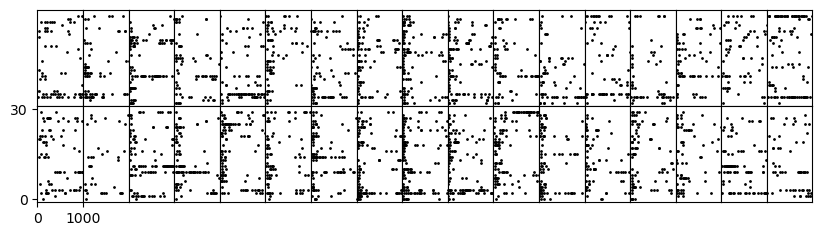

IndexError: too many indices for array: array is 4-dimensional, but 5 were indexed

In [222]:
noi = 33
print(len(pattern[0]), len(pattern[0][0]), len(pattern[0][0][0]), len(pattern[0][0][0]))
fr = PatternToCount(pattern3d=pattern[0], timeBinSz=timeBinSz, timerange=timewindow, vis=False)
print(fr.shape)
PatternRaster3d(pattern3d=pattern[0][noi], timerange=timewindow)

nmean = np.mean(fr[noi,:,:,:,:]*1000/timeBinSz, axis = 1)
nsem = np.mean(fr[noi,:,:,:,:]*1000/timeBinSz, axis = 1)/np.sqrt(30)

fig, axs = plt.subplots(1,len(stim_ind), figsize =(10,2), sharey=True)
xs = np.arange(fr.shape[-1])
for i in range(len(stim_ind)):
    axs[i].errorbar(xs, nmean[i], yerr=[np.zeros_like(nsem[i]), nsem[i]], color='k', linewidth=1)
    if i != 0:
        axs[i].set_xticklabels([])
        axs[i].spines[['left','right', 'top']].set_visible(False)
    else:
        axs[i].spines[['right', 'top']].set_visible(False)
axs[0].set_xticks([xs[0], xs[-1]])
axs[0].set_xticklabels(timewindow)
plt.subplots_adjust(wspace=0, hspace=0)  
plt.show()

[ 2. 17. 30.]


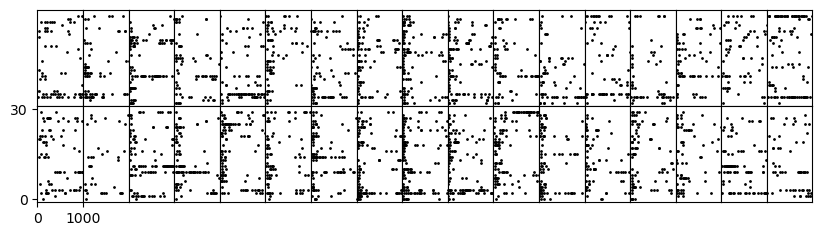

In [208]:
def PatternRaster3d(pattern3d, timerange=None):
    # make/visualize a raster plot based on the data given
    ns = np.zeros(3)
    ns[0] = len(pattern3d)
    ns[1] = len(pattern3d[0])
    ns[2] = len(pattern3d[0][0])
    
    print(ns)
    if timerange is None:
        maxtime = 1000
        mintime = 0
    elif not isinstance(timerange, list):
        mintime = 0
        maxtime = timerange
    elif len(timerange) == 1:
        mintime = 0
        maxtime = timerange[0]
    elif len(timerange)==2:
        mintime = timerange[0]
        maxtime = timerange[1]
        
    dur = maxtime - mintime
    
    fig, axs = plt.subplots(int(ns[0]), int(ns[1]), figsize=(10,2.5))
    
    xpos = int(0)
    x = int(0)
    for x in np.arange(ns[0]):
        x = int(ns[0]-1-x)
        for y in np.arange(ns[1]):
            y = int(y)
            for t in np.arange(ns[2]):
                t = int(t)
                try:
                    xs = np.squeeze(pattern3d[x][y][t])
    #                 print(xs)
                    try:
                        ys = np.ones(xs.shape)*t
                    except:
                        ys = np.ones(xs.shape[0])*t
                except Exception as e:
                    print(e)
                    xs = np.nan
                    ys = np.nan
                if np.isnan(xs).any(): continue
                axs[x][y].scatter(xs, ys, s=1, c='k')
                xs = np.nan
            axs[x][y].set_yticks([])
            axs[x][y].set_xticks([])
            axs[x][y].set_xlim([mintime, maxtime])
            axs[x][y].set_ylim([-1, ns[2]+1])
    axs[int(ns[0]-1)][0].set_yticks([0, ns[2]])
    axs[int(ns[0]-1)][0].set_xticks([mintime, maxtime])
    axs[int(ns[0]-1)][0].set_xticklabels([0, dur])
    plt.subplots_adjust(wspace=0, hspace=0)
    # savedir = '/media/ackmanadmin/BrianMullen/pop_encoding_fig/'
    # plt.savefig(savedir + 'raster_example.png', dpi=300)
    plt.show()
    
PatternRaster3d(pattern3d=pattern[0][noi], timerange=timewindow)
